<a href="https://colab.research.google.com/github/Pasindu2000B/EC7212-Computer-Vision-and-Image-Processing-Take-Home-Assignment-1/blob/main/Take_Home_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#EC7212 – Computer Vision and Image Processing
#Take Home Assignment 1

#1)

import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow

def reduceIntensityLevels(image, numLevels):
  value_error=True
  for i in range(1,9):
    if(numLevels==2**i):
      value_error=False
  if (value_error==True):
    print("Invalid number of intensity levels and Return Same Image")
    return image
  else:
    step=256// numLevels
    new_image=(image//step)*step
    return new_image







Enter number of intensity levels: 2


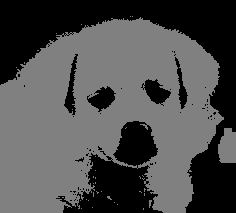

In [10]:



url = "https://raw.githubusercontent.com/Pasindu2000B/EC7212-Computer-Vision-and-Image-Processing-Take-Home-Assignment-1/main/DOG_Gray_Scale_Image.jpg"
response = requests.get(url)
image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE)

levels = int(input("Enter number of intensity levels: "))
reduced = reduceIntensityLevels(image, levels)

cv2_imshow(reduced)




Original Image:


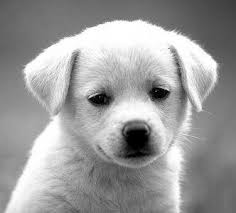

3x3 Averaged Image:


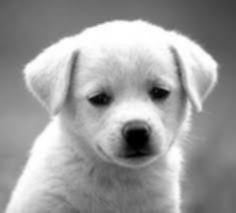

10x10 Averaged Image:


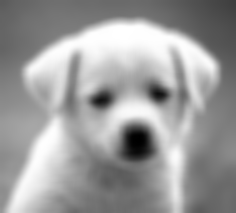

20x20 Averaged Image:


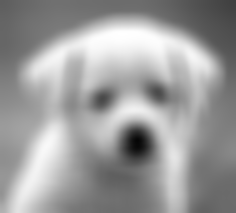

In [11]:
#2
image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE)

avg_3x3 = cv2.blur(image, (3, 3))
avg_10x10 = cv2.blur(image, (10, 10))
avg_20x20 = cv2.blur(image, (20, 20))

print("Original Image:")
cv2_imshow(image)

print("3x3 Averaged Image:")
cv2_imshow(avg_3x3 )

print("10x10 Averaged Image:")
cv2_imshow(avg_10x10)

print("20x20 Averaged Image:")
cv2_imshow(avg_20x20)

Original Image:


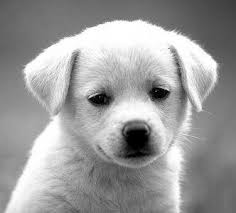

Rotated by 45 degrees:


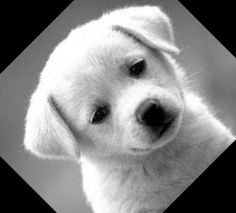

Rotated by 90 degrees:


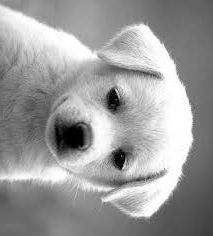

In [12]:
#3
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE)
h = image.shape[0]
w=image.shape[1]
center = (w / 2, h / 2)

matrix_45 = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(image, matrix_45, (w, h))

rotated_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

print("Original Image:")
cv2_imshow(image)

print("Rotated by 45 degrees:")
cv2_imshow(rotated_45)

print("Rotated by 90 degrees:")
cv2_imshow(rotated_90)


Original Image:


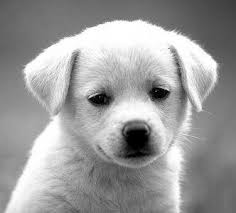

Block Averaged (3x3):


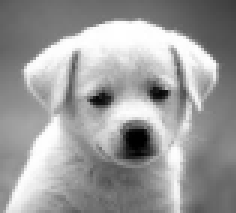

Block Averaged (5x5):


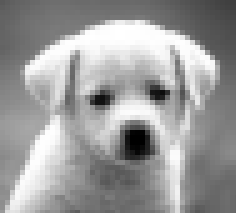

Block Averaged (7x7):


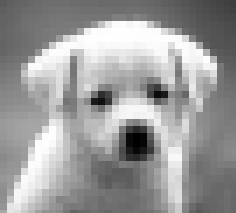

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def block_average(image, block_size):
    h= image.shape[0]
    w=image.shape[1]
    new_image = image.copy()

    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            block = image[y:y+block_size, x:x+block_size]
            avg = np.mean(block)
            new_image[y:y+block_size, x:x+block_size] = avg
    return new_image.astype(np.uint8)


image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE)


img_3x3 = block_average(image, 3)
img_5x5 = block_average(image, 5)
img_7x7 = block_average(image, 7)

print("Original Image:")
cv2_imshow(image)

print("Block Averaged (3x3):")
cv2_imshow(img_3x3)

print("Block Averaged (5x5):")
cv2_imshow(img_5x5)

print("Block Averaged (7x7):")
cv2_imshow(img_7x7)
